In [1]:
import os
import ipywidgets as widgets
%run scripts/lib.ipynb
%matplotlib inline

Using TensorFlow backend.


In [2]:
def show_stock(x):
    model = load_model(os.path.join('./models',x+'.h5'))
    df = pd.read_csv(os.path.join('./data',x+'.csv'))
    scaler = MinMaxScaler(feature_range=(-1,1))
    data = scaler.fit_transform(df.price.diff().values.reshape(-1,1))
    p = [model.predict(data[-10:].reshape(1,1,-1), batch_size=1)]
    p = inverse_transform(df.price.values, p, scaler, len(df.price.values))
    p = [df.price.values[-1]] + list(p[0])
    plt.rc('font',size=10)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    ax1.plot(df.price.values[-20:])
    ax1.plot([x for x in range(19, 23)], p, color='r')
    plt.suptitle('Query Chart')
    ax1.set_xlabel('Day')
    ax1.set_ylabel("Price ($)")
    bbox = [0,0,1,1]
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    tbl = ax2.table(cellText=df.describe().values, rowLabels=df.describe().index, bbox=bbox, colLabels=[x])

In [3]:
def all_stocks(symbols, loc):
    stocks = pd.DataFrame()
    for s in symbols:
        tmp = pd.read_csv(os.path.join(loc, s+'.csv'))
        stocks[s] = tmp['price']
    stocks.columns = symbols
    return stocks

In [4]:
loc = './data'
files = [f for f in os.listdir(loc) if os.path.isfile(os.path.join(loc,f))]
names = [os.path.splitext(f)[0] for f in files]
stocks = all_stocks(names, loc)

<h1><center>Stock Prediction</center></h1>

In [5]:
w = widgets.Dropdown(options=names, description='Stock Query: ')
t = widgets.interact(show_stock, x=w)

interactive(children=(Dropdown(description='Stock Query: ', options=('AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX'…

Query Chart: Select a stock ticker symbol from the dropdown list above in order to inspect recent price history (in blue) as well as predicted performance 3 days ahead (in red). The accompanying table provides a descriptive summary of the stock's performance over its history. 

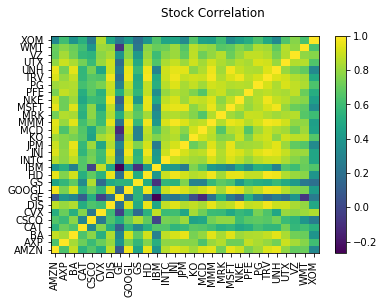

In [7]:
plt.subplots()
plt.pcolor(stocks.corr())
plt.suptitle('Stock Correlation')
plt.yticks(np.arange(0.5,len(stocks.columns),1), stocks.columns)
plt.xticks(np.arange(0.5,len(stocks.columns),1), stocks.columns, rotation=90)
plt.colorbar()
plt.show()

Stock Correlation: The above heatmap allows users to, at a glance, select uncorrelated stocks to properly diversify a portfolio. 

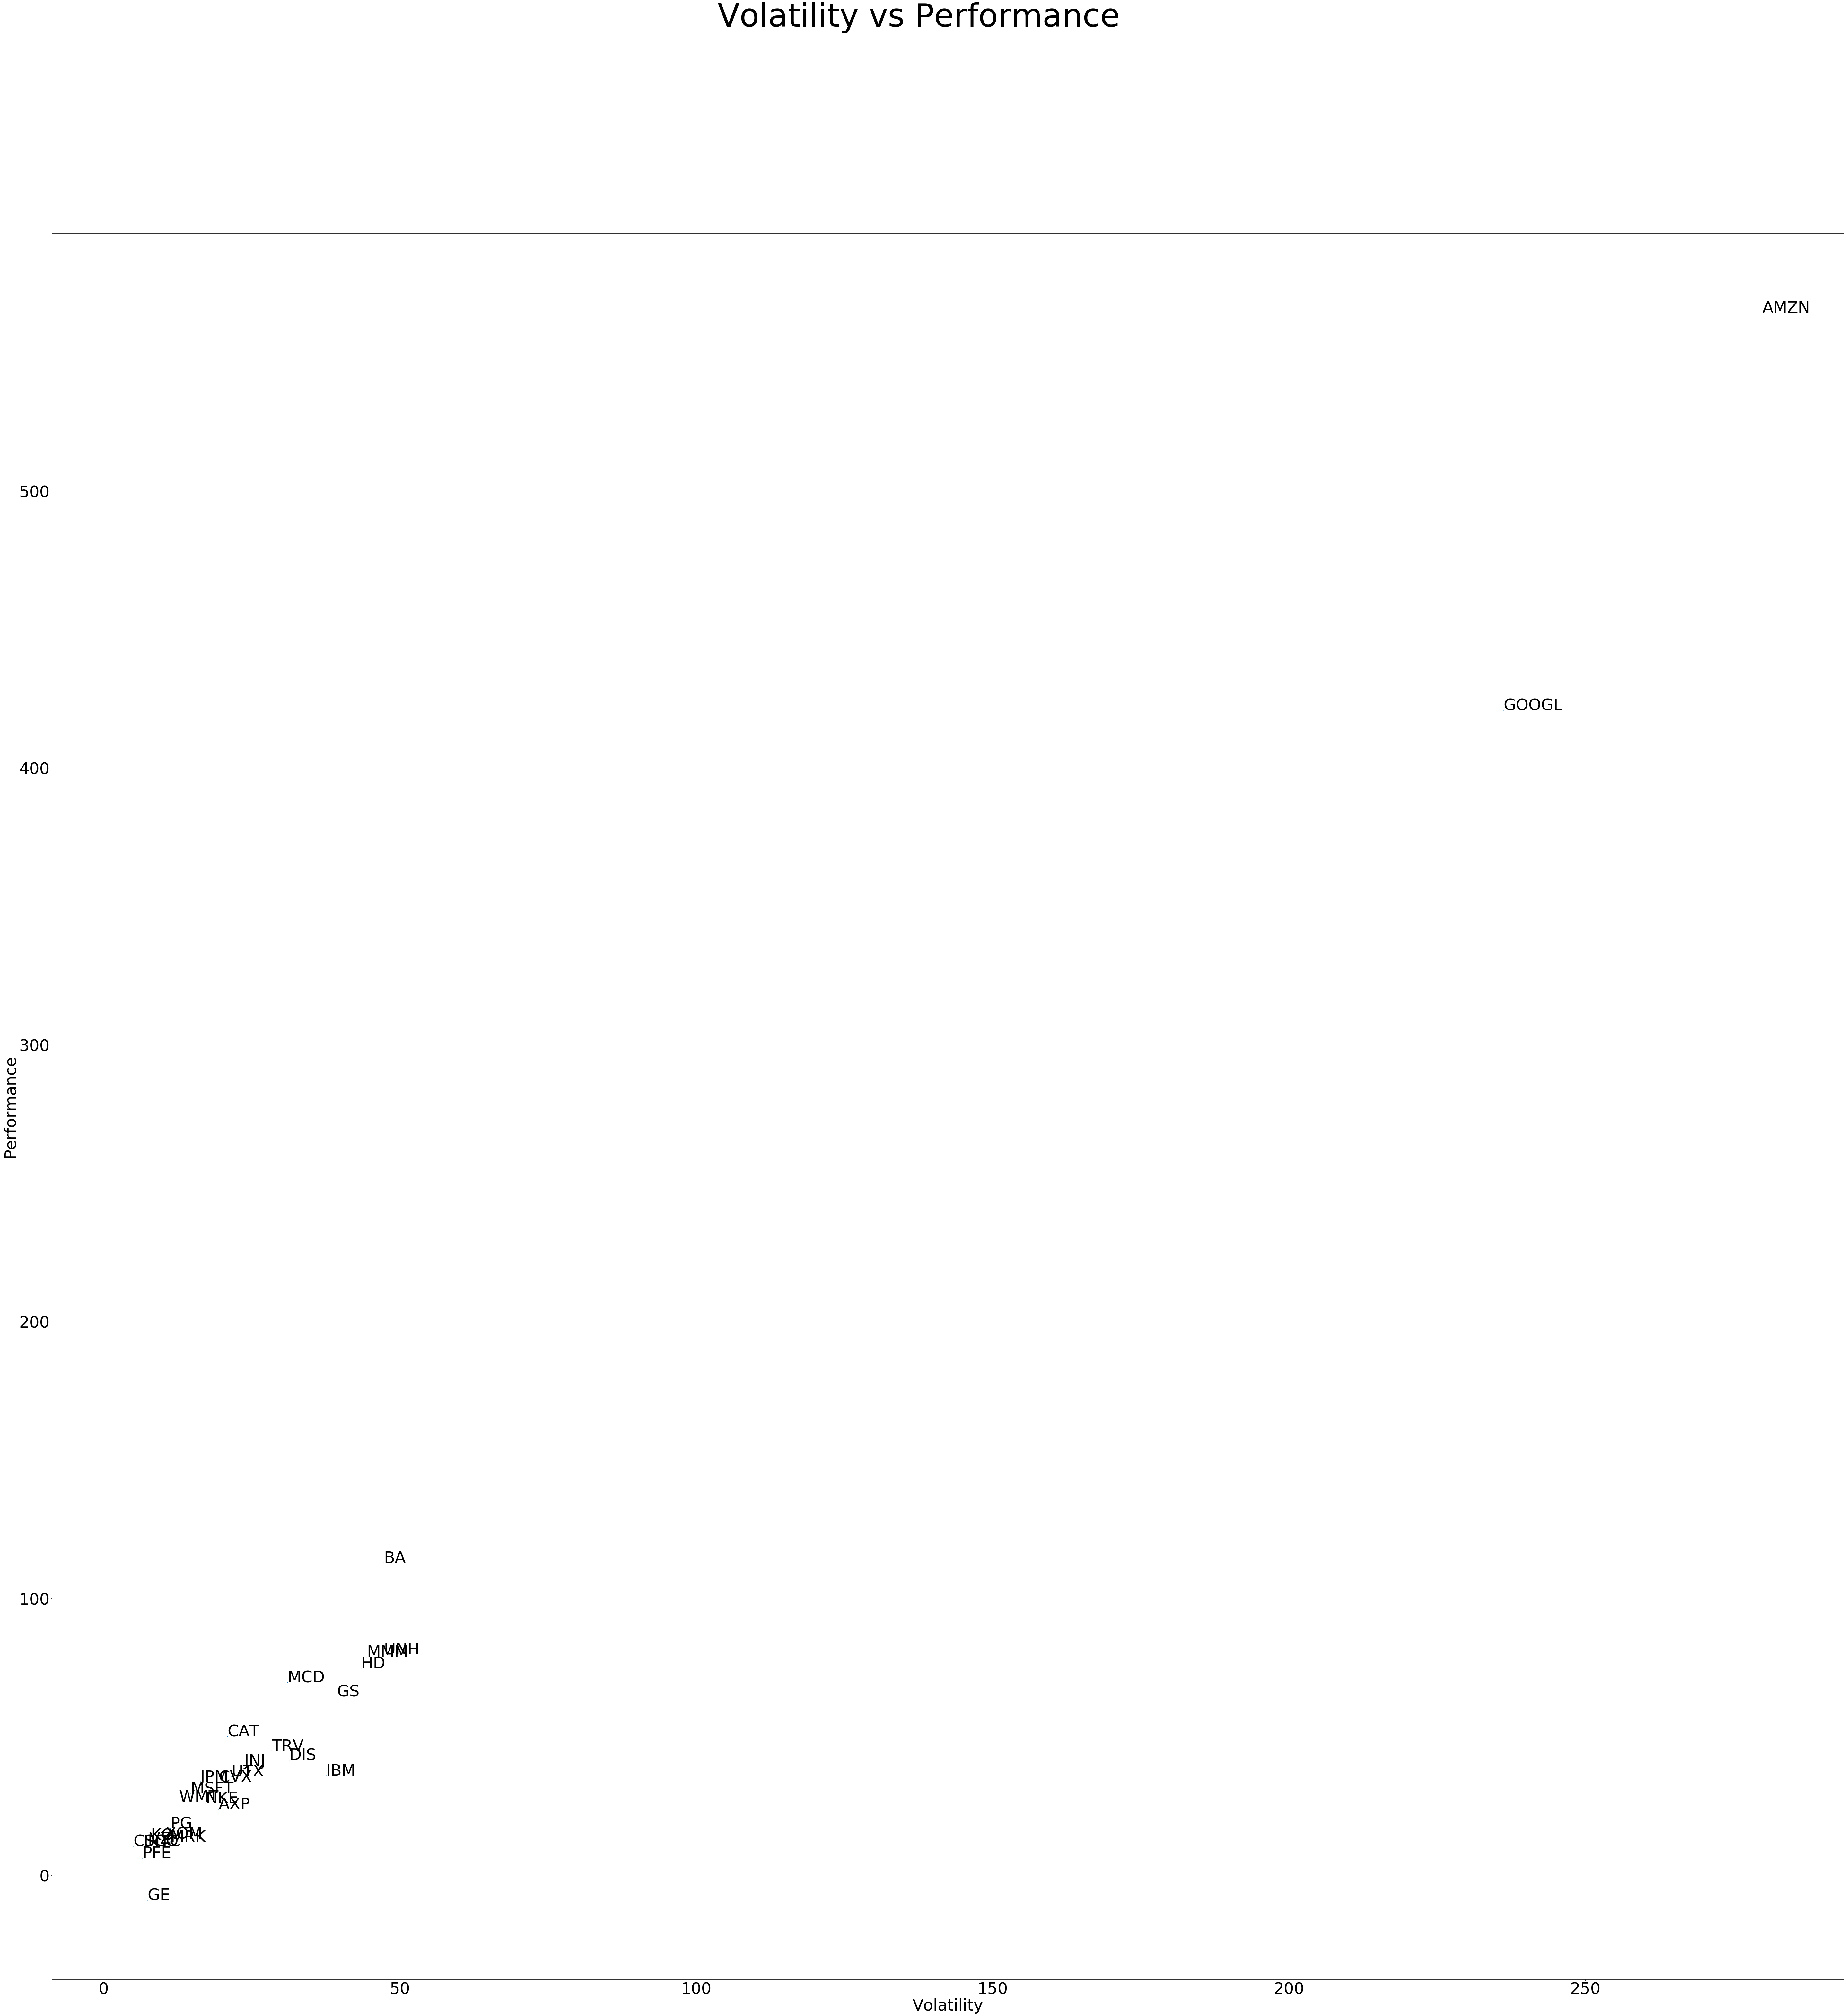

In [58]:
sp = pd.DataFrame()
sp['vol'] = [stocks[symbol].std() for symbol in stocks.columns]
sp['perf'] = [(stocks[symbol].values[-1] - stocks[symbol].values[0])/2 for symbol in stocks.columns]
plt.rc('font',size=50)
fig, ax = plt.subplots(figsize=(100,100))
plt.suptitle('Volatility vs Performance', fontsize=100)
plt.xlabel('Volatility')
plt.ylabel('Performance')
sc = plt.scatter(x=sp['vol'].values, y=sp['perf'].values, s=1)
for i, ticker in enumerate(stocks.columns):
    ax.annotate(ticker, xy=(sp['vol'].values[i], sp['perf'].values[i]))
"""
ticker = ax.annotate("", xy=(0,0), xytext=(0,0), textcoords="offset points")
ticker.set_visible(False)
def update_ticker(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    ticker.xy = pos
    ticker.set_text(" ".join([stocks.columns[n] for n in ind["ind"]]))
    
def on_hover(event):
    vis = ticker.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_ticker(ind)
            ticker.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                ticker.set_visible(False)
                fig.canvas.draw_idle()
                
fig.canvas.mpl_connect('motion_notify_event', on_hover)
"""
plt.show()

Performance vs Volatility: This scatter plot allows users to quantify risk and blend safer stocks alongside those that may offer more aggressive growth.